**Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.**

In [38]:
# importing required libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [39]:
# loading the dataset
import pandas as pd
Abalone_dataset=pd.read_csv("Abalone.csv")


In [40]:
# no of rows & columns in the dataset.
Abalone_dataset.shape

(4177, 9)

In [41]:
# first 5 rows of the dataset.
Abalone_dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [42]:
# checking for missing values
Abalone_dataset.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [43]:
# Data Analysis & Visulaization
#Statistical measures of the dataset.
Abalone_dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


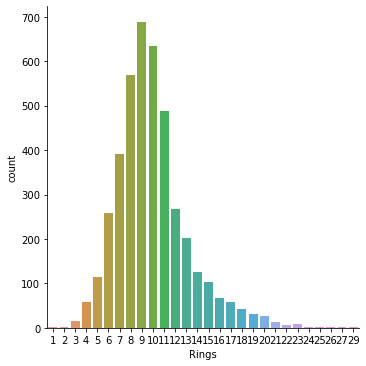

In [46]:
# numbers of values for each rings.
sns.catplot(x='Rings',data=Abalone_dataset,kind='count')

<AxesSubplot:xlabel='Sex', ylabel='Rings'>

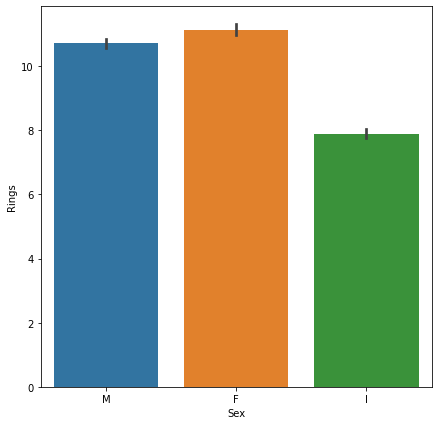

In [50]:
# Sex vs Rings
plot=plt.figure(figsize=(7,7))
sns.barplot(x='Sex',y='Rings',data=Abalone_dataset)

<AxesSubplot:xlabel='Rings', ylabel='Height'>

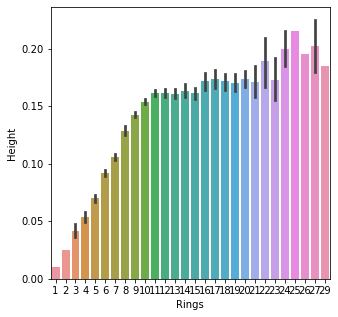

In [53]:
# Height vs Rings
plot=plt.figure(figsize=(5,5))
sns.barplot(x='Rings',y='Height',data=Abalone_dataset)

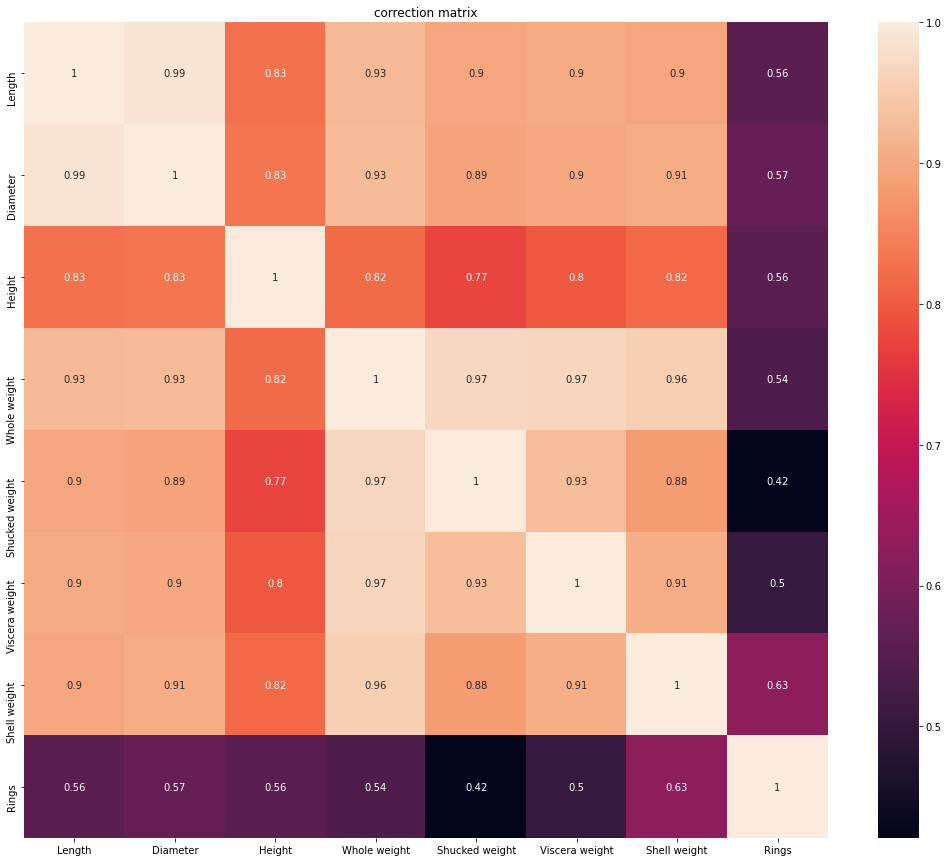

In [54]:
corr_mat=Abalone_dataset.corr()
plt.figure(figsize=(18,15))
sns.heatmap(corr_mat,annot=True)
plt.title("correction matrix")
plt.show()

In [55]:
# Data Preprocessing - sepreate the data & label
X=Abalone_dataset.drop('Rings',axis=1)

In [67]:
# Train & Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
print(Y.shape,Y_train.shape,Y_test.shape)

(4177,) (3341,) (836,)


In [71]:
#Preprocessing + Training Function
def preprocess_and_train(df,target,task):
    df=df.copy
#if the sex column is not the target
if target!='Sex':
    dummies=pd.get_dummies(df['Sex'])
    df=pd.concat([df,dummies],axis=1)
    df=df.drop('Sex',axis=1)
#split target from df
Y=df[target].copy()
X=df.drop(target,axis=1).copy()
# train-test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=3)


NameError: name 'target' is not defined

In [63]:
# Model Training - Random Forest Classifier
model=RandomForestClassifier()